In [1]:
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.calibration import CalibrationDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.1.


In [2]:
df = pd.read_csv("../src/data/vehicle_loan/vehicle_loan_data.csv")

In [3]:
df.columns

Index(['loanDefault', 'uniqueId', 'disbursedAmount', 'assetCost', 'itv',
       'branchId', 'supplierId', 'manufacturerId', 'currentPincodeId',
       'dateOfBirth', 'employmentType', 'disbursaldate', 'stateId',
       'employeeCodeId', 'mobilenoAvlFlag', 'aadharFlag', 'panFlag',
       'voteridFlag', 'drivingFlag', 'passportFlag', 'performCnsScore',
       'performCnsScoreDescription', 'priNoOfAccts', 'priActiveAccts',
       'priOverdueAccts', 'priCurrentBalance', 'priSanctionedAmount',
       'priDisbursedAmount', 'secNoOfAccts', 'secActiveAccts',
       'secOverdueAccts', 'secCurrentBalance', 'secSanctionedAmount',
       'secDisbursedAmount', 'primaryInstalAmt', 'secInstalAmt',
       'newAcctsInLastSixMonths', 'delinquentAcctsInLastSixMonths',
       'averageAcctAge', 'creditHistoryLength', 'noOfInquiries'],
      dtype='object')

In [4]:
selected_feature = [
       'loanDefault', 'disbursedAmount', 'assetCost', 'itv',
       'employmentType', 'mobilenoAvlFlag', 'aadharFlag', 'panFlag',
       'voteridFlag', 'drivingFlag', 'passportFlag', 'performCnsScore',
       'priNoOfAccts', 'priActiveAccts',
       'priOverdueAccts', 'priCurrentBalance', 'priSanctionedAmount',
       'priDisbursedAmount', 'secNoOfAccts', 'secActiveAccts',
       'secOverdueAccts', 'secCurrentBalance', 'secSanctionedAmount',
       'secDisbursedAmount', 'primaryInstalAmt', 'secInstalAmt',
       'newAcctsInLastSixMonths', 'delinquentAcctsInLastSixMonths',
       'averageAcctAge', 'creditHistoryLength', 'noOfInquiries'
]

In [5]:
df_train = df[selected_feature]

In [6]:
one_hot = pd.get_dummies(df['employmentType'])
df_train = df_train.join(one_hot)
df_train = df_train.drop('employmentType',axis = 1)

In [11]:
1 - df_train.loanDefault.mean()

0.7829288796246258

In [22]:
df_train_1 = df_train[df_train.loanDefault == 1]

In [24]:
df_train_1.describe()

,loanDefault,disbursedAmount,assetCost,itv,mobilenoAvlFlag,aadharFlag,panFlag,voteridFlag,drivingFlag,passportFlag,...,primaryInstalAmt,secInstalAmt,newAcctsInLastSixMonths,delinquentAcctsInLastSixMonths,averageAcctAge,creditHistoryLength,noOfInquiries,Salaried,Self employed,Unknown
count,50611.0,50611.000000,50611.000000,50611.000000,50611.0,50611.000000,50611.000000,50611.000000,50611.000000,50611.000000,...,5.061100e+04,5.061100e+04,50611.000000,50611.000000,50611.00000,50611.000000,50611.000000,50611.000000,50611.000000,50611.000000
mean,1.0,56270.473869,76378.176661,76.883322,1.0,0.811385,0.076604,0.174191,0.021576,0.001462,...,1.005374e+04,2.775282e+02,0.328506,0.122641,0.65886,1.138292,0.265219,0.393393,0.574124,0.032483
std,0.0,12150.255527,18680.502609,10.327771,0.0,0.391206,0.265965,0.379278,0.145297,0.038210,...,1.246655e+05,1.104563e+04,0.885661,0.430872,1.20462,2.110674,0.835147,0.488508,0.494480,0.177281
min,1.0,13369.000000,37000.000000,15.300000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,49303.000000,65894.000000,72.055000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,55459.000000,71326.000000,79.060000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.0,61947.000000,80061.500000,84.680000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.867000e+03,0.000000e+00,0.000000,0.000000,1.00000,1.700000,0.000000,1.000000,1.000000,0.000000
max,1.0,191392.000000,281164.000000,95.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.542041e+07,1.447600e+06,20.000000,12.000000,15.80000,39.000000,19.000000,1.000000,1.000000,1.000000


In [25]:
df_train_0 = df_train[df_train.loanDefault == 0]
df_train_0.describe()

,loanDefault,disbursedAmount,assetCost,itv,mobilenoAvlFlag,aadharFlag,panFlag,voteridFlag,drivingFlag,passportFlag,...,primaryInstalAmt,secInstalAmt,newAcctsInLastSixMonths,delinquentAcctsInLastSixMonths,averageAcctAge,creditHistoryLength,noOfInquiries,Salaried,Self employed,Unknown
count,182543.0,182543.000000,1.825430e+05,182543.000000,182543.0,182543.000000,182543.000000,182543.000000,182543.000000,182543.000000,...,1.825430e+05,1.825430e+05,182543.000000,182543.000000,182543.000000,182543.000000,182543.000000,182543.000000,182543.000000,182543.000000
mean,0.0,53826.471111,7.572281e+04,74.154093,1.0,0.848343,0.075292,0.136834,0.023704,0.002312,...,1.395159e+04,3.359502e+02,0.396619,0.090505,0.731351,1.379804,0.190366,0.427012,0.540026,0.032962
std,0.0,13140.699007,1.901500e+04,11.681455,0.0,0.358689,0.263862,0.343672,0.152126,0.048026,...,1.579640e+05,1.658805e+04,0.972969,0.370235,1.264567,2.431404,0.665536,0.494645,0.498397,0.178538
min,0.0,13320.000000,3.700000e+04,10.030000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,46369.000000,6.568000e+04,68.020000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,53303.000000,7.084500e+04,76.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.0,59947.000000,7.899900e+04,83.160000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.038000e+03,0.000000e+00,0.000000,0.000000,1.100000,2.000000,0.000000,1.000000,1.000000,0.000000
max,0.0,990572.000000,1.628992e+06,95.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.564281e+07,4.170901e+06,35.000000,20.000000,30.900000,37.500000,36.000000,1.000000,1.000000,1.000000


In [26]:
X = df_train.iloc[:, 1:]
y = df_train.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
clf = LogisticRegression(random_state=0, 
                         n_jobs = 16,
                         max_iter = 1000,
                         penalty = 'none',
                        ).fit(X_train, y_train)
clf.score(X_train, y_train)

0.7837424875216461

In [43]:
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=3)
# neigh.fit(X_train, y_train)
# neigh.score(X_train, y_train)

In [36]:
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(max_depth=5, random_state=0)
# clf.fit(X_train, y_train)
# clf.score(X_train, y_train)

In [37]:
clf.score(X_test, y_test)

0.7796315755613219

In [38]:
from sklearn import metrics

/home/j1feng/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


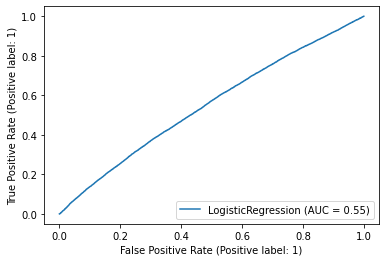

In [39]:
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

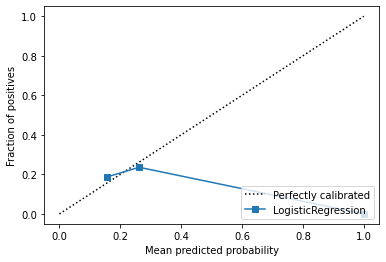

In [40]:
from sklearn.calibration import CalibrationDisplay
disp = CalibrationDisplay.from_estimator(clf, X_test, y_test)
plt.show()

In [41]:
df.loanDefault.value_counts()

0    182543
1     50611
Name: loanDefault, dtype: int64

In [34]:
1-5/23

0.782608695652174